In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential, load_model

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
# Define your data directories here
dir_sp_train = 'E:\\data\\drawings\\spiral\\training'
dir_sp_test = 'E:\\data\\drawings\\spiral\\testing'
dir_wv_train = 'E:\\data\\drawings\\wave\\training'
dir_wv_test = 'E:\\data\\drawings\\wave\\testing'

In [3]:
Name=[]
for file in os.listdir(dir_sp_train):
    Name+=[file]
print(Name)
print(len(Name))

['healthy', 'parkinson']
2


In [4]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [5]:
# Define a function to evaluate a model and calculate accuracy
def evaluate_model(model, test_data, test_labels):
    y_pred = model.predict(test_data)
    pred = np.argmax(y_pred, axis=1)
    ground_truth = np.argmax(test_labels, axis=1)
    accuracy = accuracy_score(ground_truth, pred)
    return accuracy

In [6]:
dataset_sp=[]
count=0
for file in os.listdir(dir_sp_train):
    path=os.path.join(dir_sp_train,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
        image=img_to_array(image)
        image=image/255.0
        dataset_sp.append([image,count])
    count=count+1
    
testset_sp=[]
count=0
for file in os.listdir(dir_sp_test):
    path=os.path.join(dir_sp_test,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
        image=img_to_array(image)
        image=image/255.0
        testset_sp.append([image,count])
    count=count+1 

In [7]:
dataset_wv=[]
count=0
for file in os.listdir(dir_wv_train):
    path=os.path.join(dir_wv_train,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
        image=img_to_array(image)
        image=image/255.0
        dataset_wv.append([image,count])
    count=count+1
    
testset_wv=[]
count=0
for file in os.listdir(dir_wv_test):
    path=os.path.join(dir_wv_test,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
        image=img_to_array(image)
        image=image/255.0
        testset_wv.append([image,count])
    count=count+1 

In [8]:
data_sp,labels_sp0=zip(*dataset_sp)
test_sp,tlabels_sp0=zip(*testset_sp)

data_wv,labels_wv0=zip(*dataset_wv)
test_wv,tlabels_wv0=zip(*testset_wv)

In [9]:
labels_sp1=to_categorical(labels_sp0)
data_sp=np.array(data_sp)
labels_sp=np.array(labels_sp1)

tlabels_sp1=to_categorical(tlabels_sp0)
test_sp=np.array(test_sp)
tlabels_sp=np.array(tlabels_sp1)

In [10]:
labels_wv1=to_categorical(labels_wv0)
data_wv=np.array(data_wv)
labels_wv=np.array(labels_wv1)

tlabels_wv1=to_categorical(tlabels_wv0)
test_wv=np.array(test_wv)
tlabels_wv=np.array(tlabels_wv1)

In [11]:
trainx_sp,testx_sp,trainy_sp,testy_sp=train_test_split(data_sp,labels_sp,test_size=0.2,random_state=44)
trainx_wv,testx_wv,trainy_wv,testy_wv=train_test_split(data_wv,labels_wv,test_size=0.2,random_state=44)

In [12]:
print(trainx_sp.shape)
print(testx_sp.shape)
print(trainy_sp.shape)
print(testy_sp.shape)

(57, 100, 100, 3)
(15, 100, 100, 3)
(57, 2)
(15, 2)


In [13]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [14]:
# Define your model architecture
pretrained_model = tf.keras.applications.DenseNet121(
    include_top=False,
    weights="imagenet",
    input_shape=(100, 100, 3),
    pooling='avg'
)
pretrained_model.trainable = False

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.7),  # Add dropout to prevent overfitting
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
inputs3 = pretrained_model.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
outputs3 = tf.keras.layers.Dense(2, activation='softmax')(x3)
model3 = tf.keras.Model(inputs=inputs3, outputs=outputs3)

inputs4 = pretrained_model.input
x4 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
outputs4 = tf.keras.layers.Dense(2, activation='softmax')(x4)
model4 = tf.keras.Model(inputs=inputs4, outputs=outputs4)

In [16]:
# Define a learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9
)


In [17]:
# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [18]:
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
               loss='categorical_crossentropy',
               metrics=['accuracy'])
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [19]:
his3 = model3.fit(datagen.flow(trainx_sp, trainy_sp, batch_size=32),
                      validation_data=(testx_sp, testy_sp),
                      epochs=50,
                      callbacks=[early_stopping])
his4= model4.fit(datagen.flow(trainx_wv, trainy_wv, batch_size=32),
                      validation_data=(testx_wv, testy_wv),
                      epochs=50,
                      callbacks=[early_stopping])

Epoch 1/50
2/2 [==============================] - 30s 12s/step - loss: 1.3315 - accuracy: 0.5439 - val_loss: 0.7513 - val_accuracy: 0.6000
Epoch 2/50
2/2 [==============================] - 14s 9s/step - loss: 0.8897 - accuracy: 0.4912 - val_loss: 1.1008 - val_accuracy: 0.5333
Epoch 3/50
2/2 [==============================] - 14s 9s/step - loss: 1.1128 - accuracy: 0.5965 - val_loss: 0.8719 - val_accuracy: 0.6667
Epoch 4/50
2/2 [==============================] - 14s 9s/step - loss: 0.6352 - accuracy: 0.6842 - val_loss: 0.4033 - val_accuracy: 0.8667
Epoch 5/50
2/2 [==============================] - 14s 9s/step - loss: 0.6105 - accuracy: 0.6140 - val_loss: 0.4615 - val_accuracy: 0.8000
Epoch 6/50
2/2 [==============================] - 16s 8s/step - loss: 0.6928 - accuracy: 0.6316 - val_loss: 0.3919 - val_accuracy: 0.8000
Epoch 7/50
2/2 [==============================] - 15s 8s/step - loss: 0.4667 - accuracy: 0.7895 - val_loss: 0.6963 - val_accuracy: 0.6667
Epoch 8/50
2/2 [=================

2/2 [==============================] - 15s 9s/step - loss: 0.3335 - accuracy: 0.9123 - val_loss: 0.1051 - val_accuracy: 0.9333
Epoch 36/50
2/2 [==============================] - 14s 8s/step - loss: 0.3617 - accuracy: 0.8596 - val_loss: 0.1049 - val_accuracy: 0.9333
Epoch 37/50
2/2 [==============================] - 14s 8s/step - loss: 0.3283 - accuracy: 0.8596 - val_loss: 0.1103 - val_accuracy: 1.0000
Epoch 38/50
2/2 [==============================] - 16s 9s/step - loss: 0.3828 - accuracy: 0.8246 - val_loss: 0.1005 - val_accuracy: 1.0000
Epoch 39/50
2/2 [==============================] - 14s 8s/step - loss: 0.3765 - accuracy: 0.7895 - val_loss: 0.1081 - val_accuracy: 1.0000
Epoch 40/50
2/2 [==============================] - 14s 9s/step - loss: 0.4109 - accuracy: 0.7895 - val_loss: 0.1046 - val_accuracy: 1.0000
Epoch 41/50
2/2 [==============================] - 14s 9s/step - loss: 0.3344 - accuracy: 0.9298 - val_loss: 0.1245 - val_accuracy: 1.0000
Epoch 42/50
2/2 [======================

In [20]:
# Compile the model with the learning rate schedule
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
# Train the model spiral
history = model.fit(
    datagen.flow(trainx_sp, trainy_sp, batch_size=32),
    validation_data=(testx_sp, testy_sp),
    epochs=50,
    callbacks=[early_stopping]  # Apply early stopping
)


Epoch 1/50
2/2 [==============================] - 31s 14s/step - loss: 1.8430 - accuracy: 0.4912 - val_loss: 0.8795 - val_accuracy: 0.4667
Epoch 2/50
2/2 [==============================] - 16s 9s/step - loss: 1.4482 - accuracy: 0.5439 - val_loss: 0.9020 - val_accuracy: 0.5333
Epoch 3/50
2/2 [==============================] - 16s 10s/step - loss: 1.4958 - accuracy: 0.5614 - val_loss: 0.7612 - val_accuracy: 0.6000
Epoch 4/50
2/2 [==============================] - 16s 8s/step - loss: 1.3777 - accuracy: 0.5439 - val_loss: 0.5591 - val_accuracy: 0.6000
Epoch 5/50
2/2 [==============================] - 15s 8s/step - loss: 0.9714 - accuracy: 0.5965 - val_loss: 0.6010 - val_accuracy: 0.7333
Epoch 6/50
2/2 [==============================] - 15s 8s/step - loss: 1.1599 - accuracy: 0.5789 - val_loss: 0.6024 - val_accuracy: 0.6667
Epoch 7/50
2/2 [==============================] - 15s 8s/step - loss: 0.7188 - accuracy: 0.6316 - val_loss: 0.5057 - val_accuracy: 0.6667
Epoch 8/50
2/2 [================

In [22]:
# Evaluate the model spiral
y_pred_sp=model3.predict(testx_sp)
pred_sp=np.argmax(y_pred_sp,axis=1)
ground_sp = np.argmax(testy_sp,axis=1)
print(classification_report(ground_sp,pred_sp))

1/1 [==============================] - 7s 7s/step
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.89      0.94         9

    accuracy                           0.93        15
   macro avg       0.93      0.94      0.93        15
weighted avg       0.94      0.93      0.93        15



In [23]:
# Train the model wave
history = model.fit(
    datagen.flow(trainx_wv, trainy_wv, batch_size=32),
    validation_data=(testx_wv, testy_wv),
    epochs=50,
    callbacks=[early_stopping]  # Apply early stopping
)

Epoch 1/50
2/2 [==============================] - 15s 8s/step - loss: 1.4777 - accuracy: 0.4737 - val_loss: 0.7776 - val_accuracy: 0.6000
Epoch 2/50
2/2 [==============================] - 15s 8s/step - loss: 1.0559 - accuracy: 0.5088 - val_loss: 0.6500 - val_accuracy: 0.6000
Epoch 3/50
2/2 [==============================] - 15s 8s/step - loss: 0.9099 - accuracy: 0.4737 - val_loss: 0.7490 - val_accuracy: 0.5333
Epoch 4/50
2/2 [==============================] - 15s 9s/step - loss: 0.7117 - accuracy: 0.6140 - val_loss: 0.9062 - val_accuracy: 0.4667
Epoch 5/50
2/2 [==============================] - 14s 9s/step - loss: 0.8000 - accuracy: 0.6140 - val_loss: 0.9461 - val_accuracy: 0.4000
Epoch 6/50
2/2 [==============================] - 15s 8s/step - loss: 0.7743 - accuracy: 0.6140 - val_loss: 0.8819 - val_accuracy: 0.4667
Epoch 7/50
2/2 [==============================] - 14s 9s/step - loss: 0.6986 - accuracy: 0.5965 - val_loss: 0.7899 - val_accuracy: 0.4667
Epoch 8/50
2/2 [==================

In [24]:
# Evaluate the model wave
y_pred_wv = model4.predict(testx_wv)
pred_wv = np.argmax(y_pred_wv, axis=1)
ground_wv = np.argmax(testy_wv, axis=1)
print(classification_report(ground_wv, pred_wv))


1/1 [==============================] - 6s 6s/step
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.89      0.94         9

    accuracy                           0.93        15
   macro avg       0.93      0.94      0.93        15
weighted avg       0.94      0.93      0.93        15



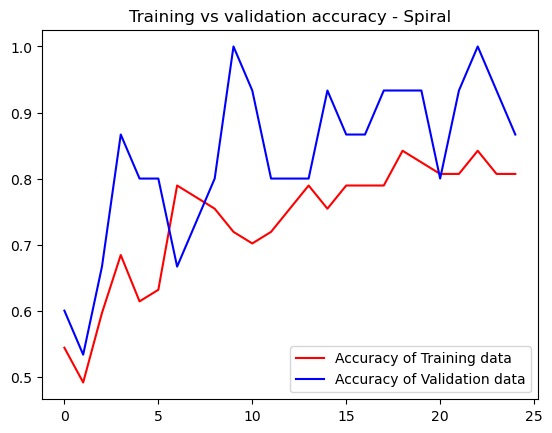

<Figure size 640x480 with 0 Axes>

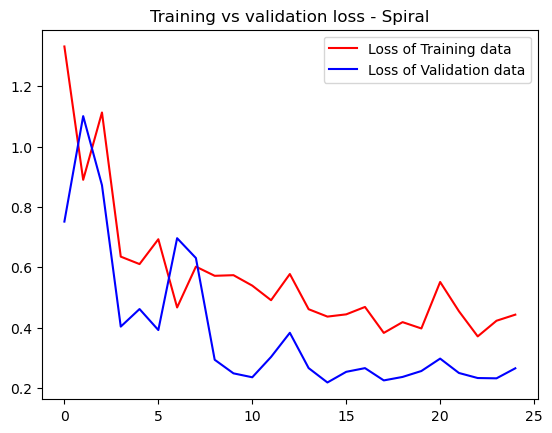

<Figure size 640x480 with 0 Axes>

In [25]:
get_acc3 = his3.history['accuracy']
value_acc3 = his3.history['val_accuracy']
get_loss3 = his3.history['loss']
validation_loss3 = his3.history['val_loss']

epochs3 = range(len(get_acc3))
plt.plot(epochs3, get_acc3, 'r', label='Accuracy of Training data')
plt.plot(epochs3, value_acc3, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy - Spiral')
plt.legend(loc=0)
plt.figure()
plt.show()

epochs3 = range(len(get_loss3))
plt.plot(epochs3, get_loss3, 'r', label='Loss of Training data')
plt.plot(epochs3, validation_loss3, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss - Spiral')
plt.legend(loc=0)
plt.figure()
plt.show()

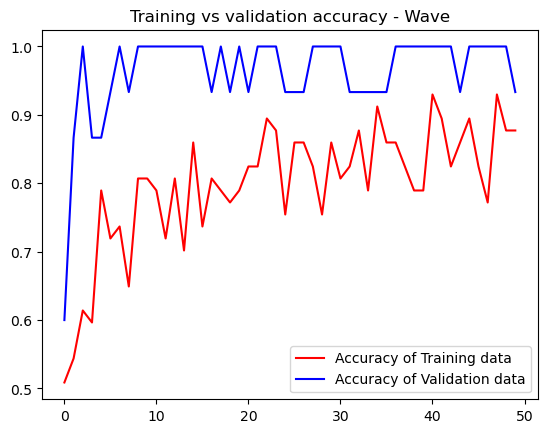

<Figure size 640x480 with 0 Axes>

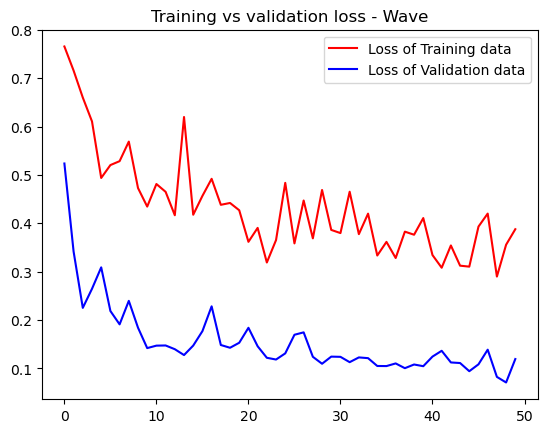

<Figure size 640x480 with 0 Axes>

In [26]:
get_acc4 = his4.history['accuracy']
value_acc4 = his4.history['val_accuracy']
get_loss4 = his4.history['loss']
validation_loss4 = his4.history['val_loss']

epochs4 = range(len(get_acc4))
plt.plot(epochs4, get_acc4, 'r', label='Accuracy of Training data')
plt.plot(epochs4, value_acc4, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy - Wave')
plt.legend(loc=0)
plt.figure()
plt.show()

epochs4 = range(len(get_loss4))
plt.plot(epochs4, get_loss4, 'r', label='Loss of Training data')
plt.plot(epochs4, validation_loss4, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss - Wave')
plt.legend(loc=0)
plt.figure()
plt.show()

In [27]:
# Assuming you have multiple models stored in a list
models = [model3, model4]  # Add your models to this list

# Assuming you have corresponding test data and labels for each model
test_data_list = [testx_sp, testx_wv]  # Add your test data lists
test_labels_list = [testy_sp, testy_wv]  # Add your test labels lists

In [28]:
# Calculate and print accuracy for each model
for i, model in enumerate(models):
    test_data = test_data_list[i]
    test_labels = test_labels_list[i]
    
    accuracy = evaluate_model(model, test_data, test_labels)
    print(f"Model {i+1} Accuracy: {accuracy * 100:.2f}%")

1/1 [==============================] - 3s 3s/step
Model 1 Accuracy: 93.33%
1/1 [==============================] - 3s 3s/step
Model 2 Accuracy: 93.33%


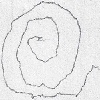

In [29]:
load_img("E:\\data\\drawings\\spiral\\testing\\parkinson\\V03PE07.png",target_size=(100,100))


In [30]:
image=load_img("E:\\data\\drawings\\spiral\\testing\\parkinson\\V03PE07.png",target_size=(100,100))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image=np.expand_dims(image, axis=0)

prediction=model3.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

1/1 [==============================] - 0s 269ms/step
Prediction is parkinson.


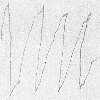

In [31]:
load_img("E:\\data\\drawings\\wave\\testing\\parkinson\\V03PO01.png",target_size=(100,100))

In [32]:
image2=load_img("E:\\data\\drawings\\wave\\testing\\parkinson\\V03PO01.png",target_size=(100,100))

image2=img_to_array(image2) 
image2=image2/255.0
prediction_image2=np.array(image2)
prediction_image2=np.expand_dims(image2, axis=0)

prediction2=model4.predict(prediction_image2)
value2=np.argmax(prediction2)
move_name2=mapper(value2)
print("Prediction is {}.".format(move_name2))

1/1 [==============================] - 0s 266ms/step
Prediction is parkinson.


In [33]:
print(test_sp.shape)
prediction_sp=model3.predict(test_sp)
print(prediction_sp.shape)

PRED_sp=[]
for item in prediction_sp:
    value_sp=np.argmax(item)      
    PRED_sp+=[value_sp]
    
ANS_sp=tlabels_sp0
accuracy_sp=accuracy_score(ANS_sp,PRED_sp)
print(accuracy_sp)   

(30, 100, 100, 3)
1/1 [==============================] - 6s 6s/step
(30, 2)
0.7


In [35]:
# Save the model to a .h5 file
from keras.models import Sequential, load_model

model.save("densenet_Model.h5")

print("Model saved to disk as 'densenet_Model.h5'")
# Load the saved model
loaded_model = load_model("densenet_Model.h5")

C:\Users\mahmoud\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to disk as 'densenet_Model.h5'
